# Creating a Test System 

This is the 4 bus example from J. J. Grainger and W. D. Stevenson, Power system analysis. McGraw-Hill, 1994. pp. 337-338. 

The data of 4 bus system from this website:

https://drive.google.com/file/d/1ChykEHaZI1fKqPoiSb9CTZD6V_eTFvRk/view

https://pandapower.readthedocs.io/en/develop/networks/power_system_test_cases.html#case-4gs

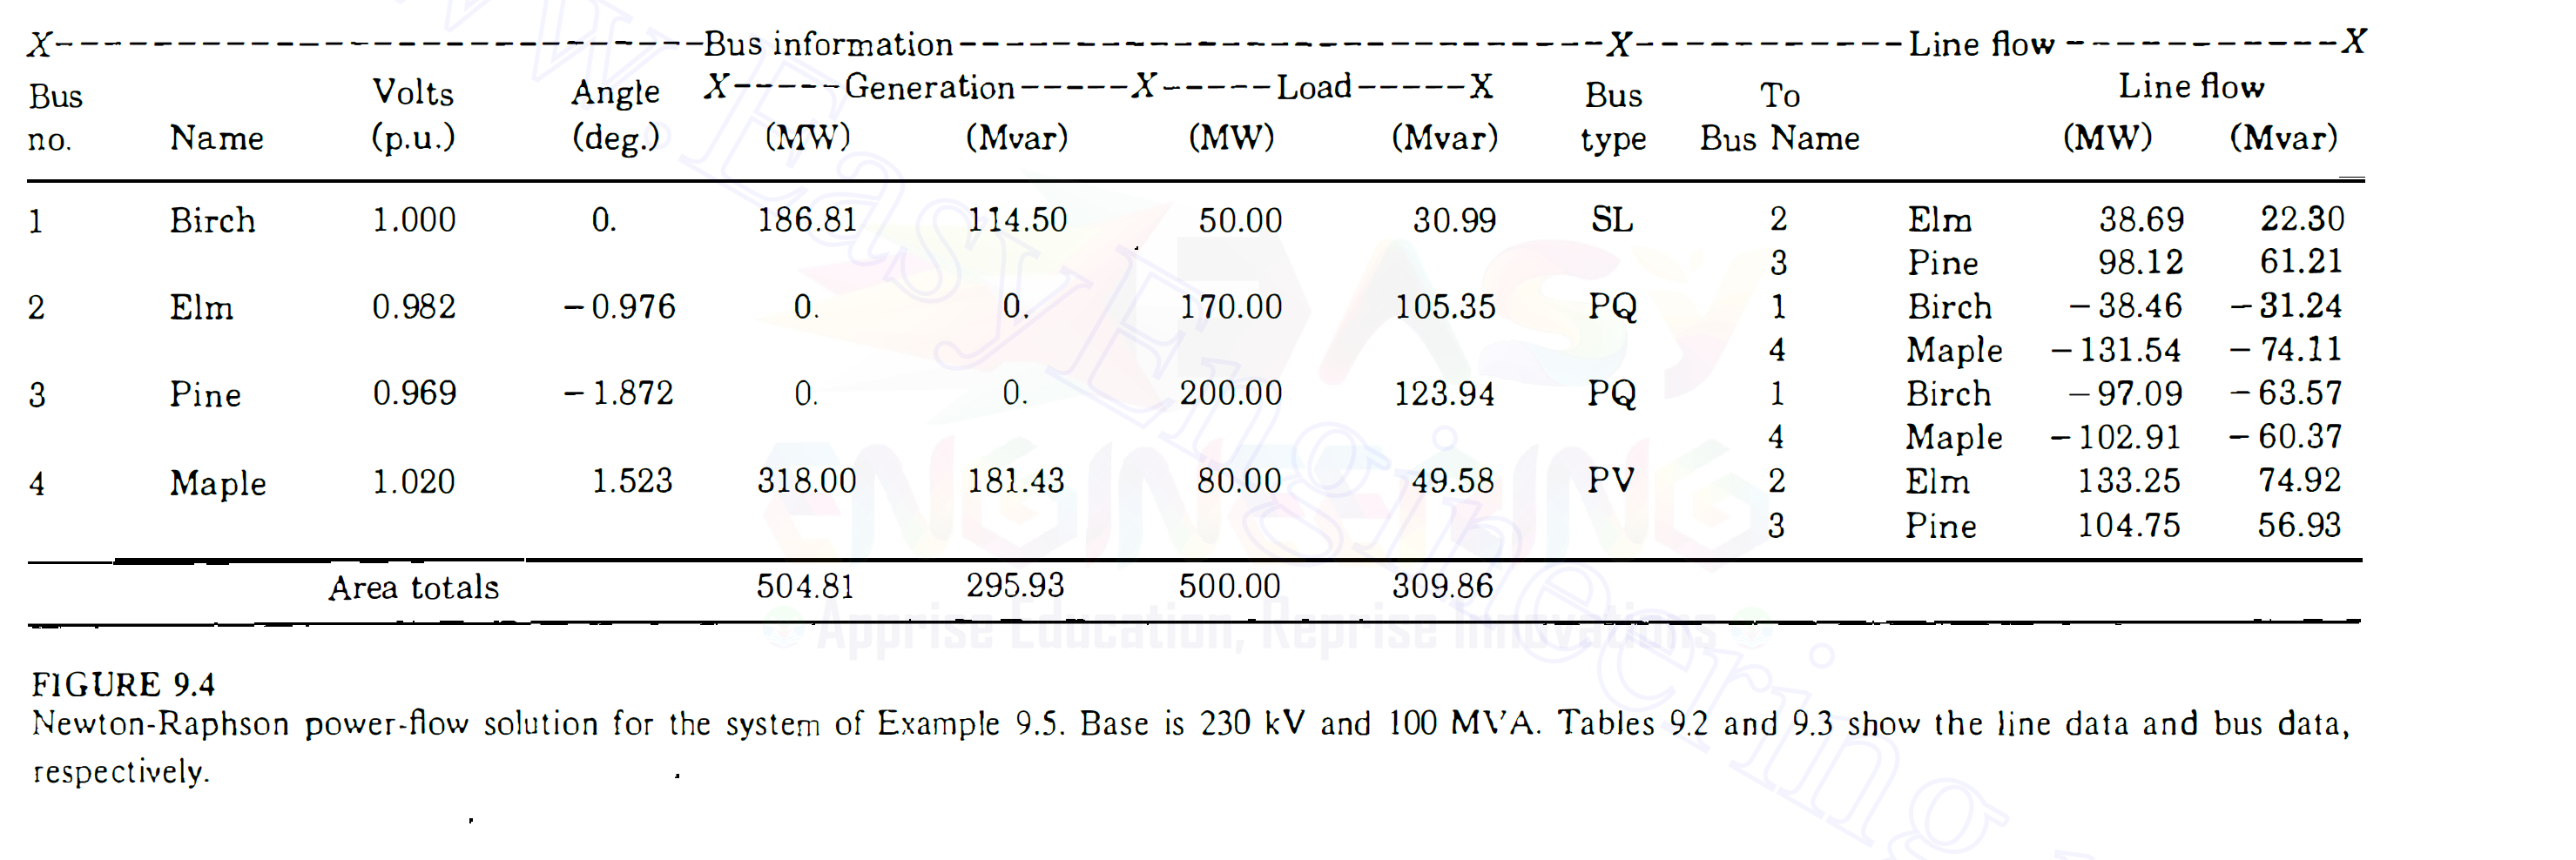

In [1]:
import pandapower as pp
import pandapower.plotting as plot
from numpy import pi
import os
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
import pandapower.networks as pn

net = pn.case4gs()

In [3]:
net

This pandapower network includes the following parameter tables:
   - bus (4 elements)
   - load (4 elements)
   - gen (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - bus_geodata (4 elements)

In [4]:
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.1,0.9,0,b,230.0,1
1,True,1.1,0.9,1,b,230.0,1
2,True,1.1,0.9,2,b,230.0,1
3,True,1.1,0.9,3,b,230.0,1


In [5]:
net.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.0,0.0,0.0,100.0,-100.0


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,3,True,True,None,318.0,1.0,NaN,None,1.02,False,318.0,0.0,100.0,-100.0


In [7]:
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,513.969177,1.0,0,0.0,True,1.0,0.627555,100.0,None,1,5.33232,None,1,ol,26.6616
1,388.610841,1.0,0,0.0,True,1.0,0.627555,100.0,None,1,3.93576,None,2,ol,19.6788
2,388.610841,1.0,1,0.0,True,1.0,0.627555,100.0,None,1,3.93576,None,3,ol,19.6788
3,639.327512,1.0,2,0.0,True,1.0,0.627555,100.0,None,1,6.72888,None,3,ol,33.6444


In [8]:
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,0,0.0,0.0,False,True,None,50.0,30.99,1.0,NaN,None
1,1,0.0,0.0,False,True,None,170.0,105.35,1.0,NaN,None
2,2,0.0,0.0,False,True,None,200.0,123.94,1.0,NaN,None
3,3,0.0,0.0,False,True,None,80.0,49.58,1.0,NaN,None


In [9]:
pp.runpp(net)

In [10]:
net.res_ext_grid

,p_mw,q_mvar
0,186.809078,114.500841


In [11]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-136.809078,-83.510841
1,0.982421,-0.976122,170.000000,105.350000
2,0.969005,-1.872177,200.000000,123.940000
3,1.020000,1.523055,-238.000000,-131.849643


In [12]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,38.691532,22.298456,-38.464825,-31.236319,0.226707,-8.937863,0.112099,0.126608,0.126608,1.000000,0.000000,0.982421,-0.976122,20.174846
1,98.117546,61.212385,-97.086107,-63.568702,1.031438,-2.356318,0.290297,0.300619,0.300619,1.000000,0.000000,0.969005,-1.872177,47.903200
2,-131.535175,-74.113681,133.250652,74.919558,1.715477,0.805876,0.385769,0.376208,0.385769,0.982421,-0.976122,1.020000,1.523055,61.471788
3,-102.913893,-60.371298,104.749348,56.930086,1.835455,-3.441212,0.309086,0.293401,0.309086,0.969005,-1.872177,1.020000,1.523055,49.252410


In [13]:
net.res_bus.vm_pu.max()
net.res_bus.vm_pu >1
net.res_bus[net.res_bus.vm_pu >1]

,vm_pu,va_degree,p_mw,q_mvar
3,1.02,1.523055,-238.0,-131.849643


In [14]:
net.res_line.loading_percent[net.res_line.loading_percent>50]

2    61.471788
Name: loading_percent, dtype: float64

In [15]:
net.res_bus.loc[net.res_bus.vm_pu>1]

,vm_pu,va_degree,p_mw,q_mvar
3,1.02,1.523055,-238.0,-131.849643


In [16]:
net

This pandapower network includes the following parameter tables:
   - bus (4 elements)
   - load (4 elements)
   - gen (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - bus_geodata (4 elements)
 and the following results tables:
   - res_bus (4 elements)
   - res_line (4 elements)
   - res_ext_grid (1 element)
   - res_load (4 elements)
   - res_gen (1 element)

In [17]:
# net.bus_geodata

In [18]:
# plot.simple_plot(net)

### Plotting the Grid

In [19]:
import matplotlib.pyplot as plt
import os
import pandapower as pp
import pandapower.plotting as plot
import pandapower.networks as nw
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

In [20]:
net.bus_geodata

,x,y,coords
0,-2.203674,3.464607,None
1,-2.065980,2.391568,None
2,-1.152367,3.554752,None
3,-0.976096,2.499829,None


In [21]:
net.bus_geodata.x[0]=net.bus_geodata.x[1]; net.bus_geodata.y[0]=net.bus_geodata.y[2]
net.bus_geodata.x[2]=net.bus_geodata.x[3]; net.bus_geodata.y[1]=net.bus_geodata.y[3]
net.bus_geodata

,x,y,coords
0,-2.065980,3.554752,None
1,-2.065980,2.499829,None
2,-0.976096,3.554752,None
3,-0.976096,2.499829,None


In [22]:
#plot buses
bc = plot.create_bus_collection(net, size=.04, zorder=10, color="k", patch_type="rect")

In [23]:
#plot lines and switches
tie_lines = set(net.switch.element[~net.switch.closed.values].values)
lines = set(net.line.index) - tie_lines
lc = plot.create_line_collection(net, lines, linewidths=2, use_bus_geodata=True, color="k")

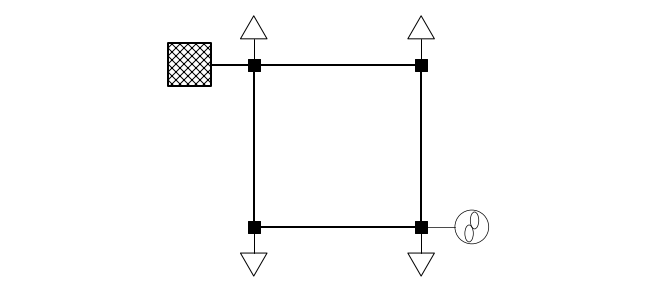

In [24]:
#plot load and generation elements
orient =[0, pi, 0, pi]
lc1 = plot.create_load_collection(net, size=0.1, orientation=orient, linewidths=1.)
sc1 = plot.create_gen_collection(net, size=0.11, orientation=0.5*pi, linewidths=0.7)
sl1 = plot.create_ext_grid_collection(net, size=0.14, orientation=3*pi/2, linewidths=2.)
plot.draw_collections([bc,lc, lc1, sc1, sl1], figsize=(9,4))
plt.show()

### Check out Ybus
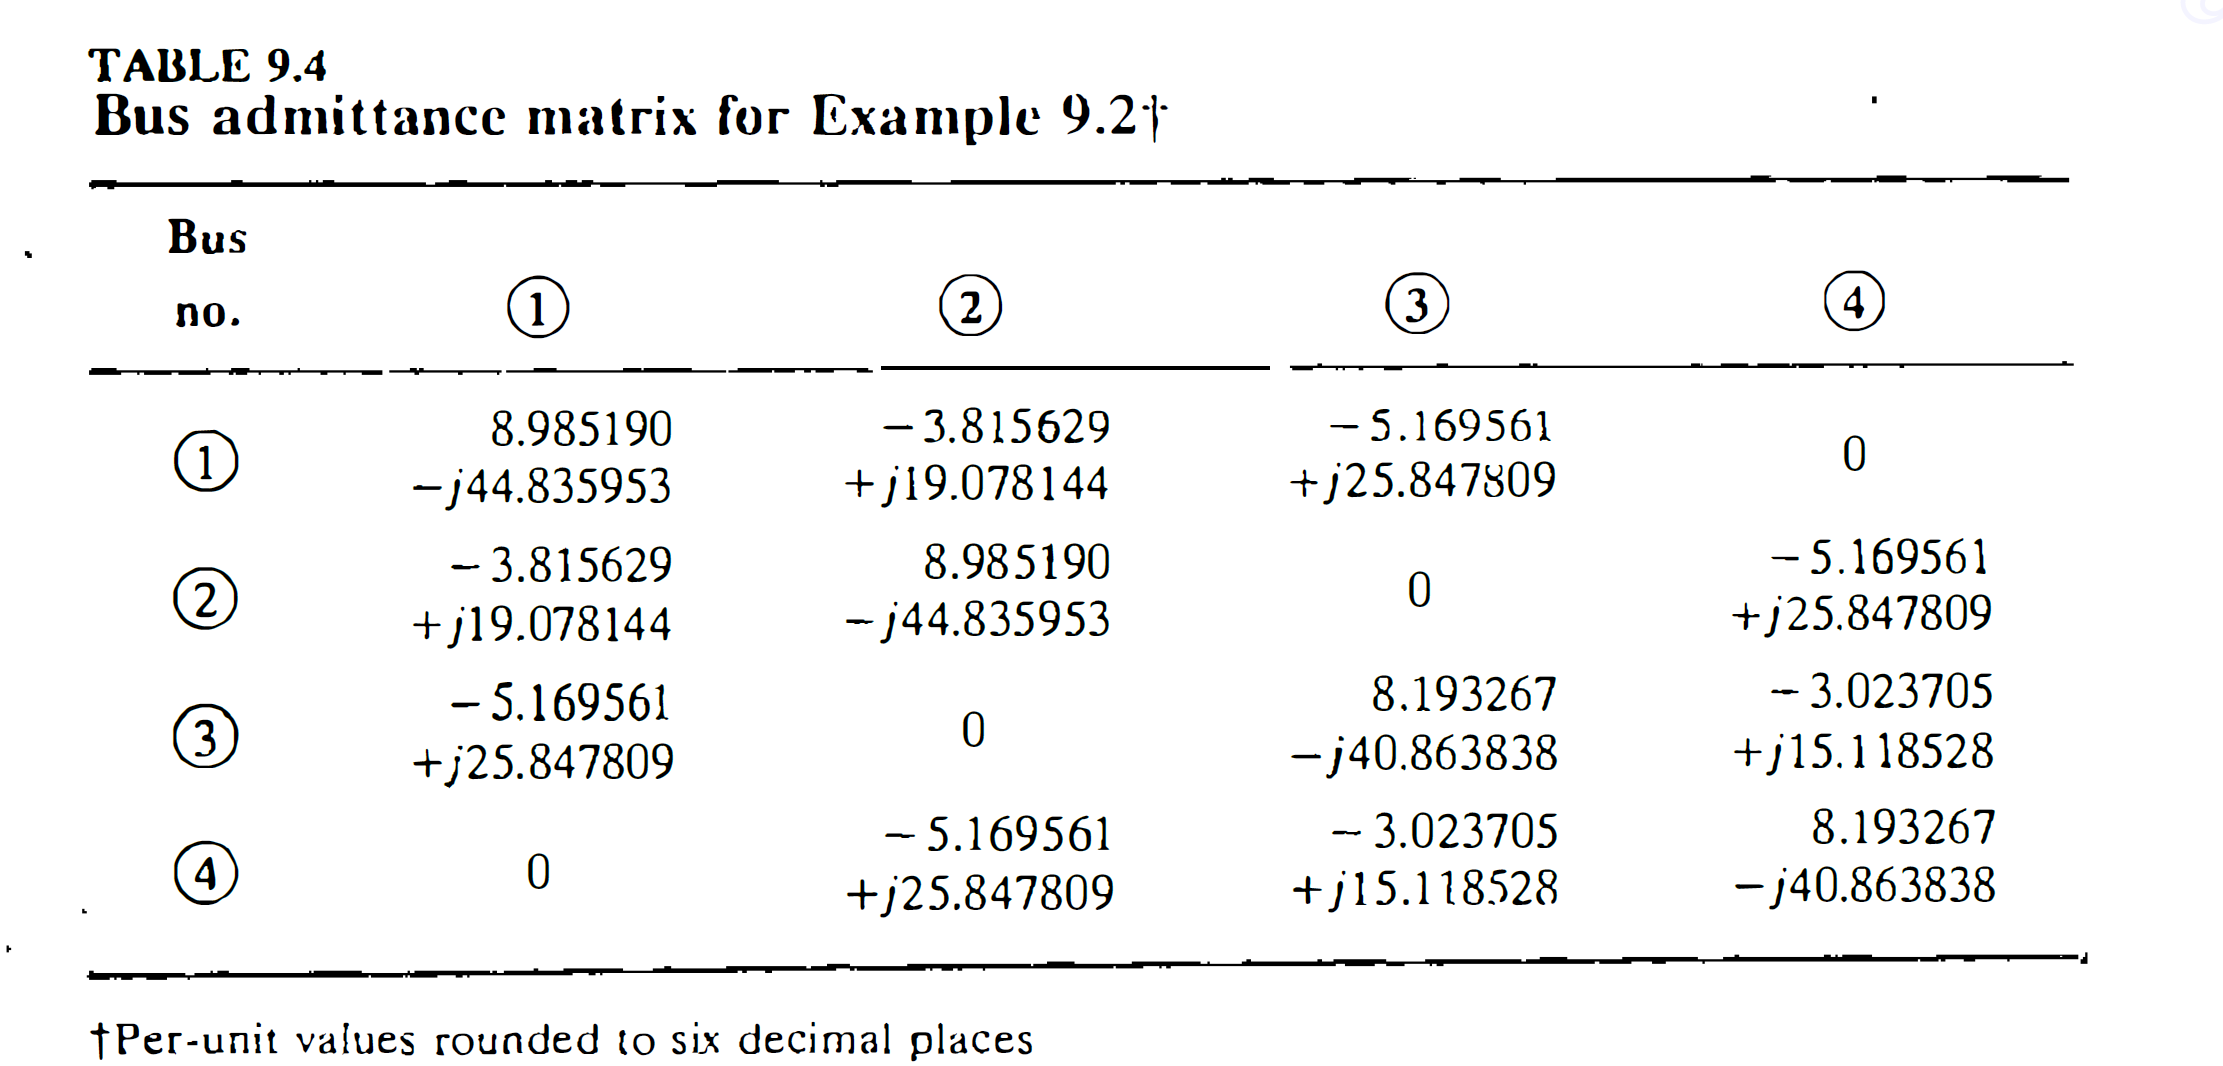

In [26]:
Ybs=(round(net['_ppc']['internal']['Ybus'],5))
print(Ybs)

  (0, 0)	(898.51904-4483.59522j)
  (0, 1)	(-381.56288+1907.81441j)
  (0, 2)	(-516.95616+2584.78081j)
  (1, 0)	(-381.56288+1907.81441j)
  (1, 1)	(898.51904-4483.59522j)
  (1, 3)	(-516.95616+2584.78081j)
  (2, 0)	(-516.95616+2584.78081j)
  (2, 2)	(819.32675-4086.38374j)
  (2, 3)	(-302.37059+1511.85293j)
  (3, 1)	(-516.95616+2584.78081j)
  (3, 2)	(-302.37059+1511.85293j)
  (3, 3)	(819.32675-4086.38374j)


In [34]:
Ybs[0,3], Ybs[1,2], Ybs[2,1], Ybs[3,0]

(0j, 0j, 0j, 0j)

In [37]:
# print(Ybs*Ybs)

In [58]:
import numpy as np
Ipu = np.array([[0.1, 0.3, 0.23, 0.13]]).T*1e-2
print(Ipu)

[[0.001 ]
 [0.003 ]
 [0.0023]
 [0.0013]]


In [59]:
print(Ybs*Ipu)

[[-1.43516877+7.18484387j]
 [ 1.64195123-8.1827562j ]
 [ 0.9744136 -4.84849298j]
 [-1.18119606+5.91930531j]]
